# Greedy Filter Example

The `GreedyFilter` class is used to keep only those rules which, when considered together, give the greatest performance.

## Requirements

To run, you'll need the following:

* A rule set (specifically the binary columns of the rules as applied to a dataset).

----

## Import packages

In [1]:
from iguanas.rule_selection import GreedyFilter
from iguanas.metrics.classification import FScore

import pandas as pd

## Read in data

Let's read in some dummy rules (stored as binary columns) and the target column.

In [2]:
X_rules_train = pd.read_csv(
    'dummy_data/X_rules_train.csv', 
    index_col='eid'
)
y_train = pd.read_csv(
    'dummy_data/y_train.csv', 
    index_col='eid'
).squeeze()
X_rules_test = pd.read_csv(
    'dummy_data/X_rules_test.csv', 
    index_col='eid'
)
y_test = pd.read_csv(
    'dummy_data/y_test.csv', 
    index_col='eid'
).squeeze()

----

## Filter rules which degrade combined performance

The process works by sorting the rules by a given performance metric, then iterating through the rules to calculate the performance of the top *n* combined rules (e.g. top 1 overall performance, top 2 overall performance, etc). When calculating the combined performance, the rules are connected with OR conditions. 

The top *n* number of rules which give the highest overall performance are kept.

### Set up class parameters

Now we can set our class parameters for the `GreedyFilter` class. Here, we'll both sort the rules and optimise their combined performance by F1 score.

**Please see the class docstring for more information on each parameter.**

In [3]:
f1 = FScore(beta=1)

In [4]:
params = {
    'metric': f1.fit,
    'sorting_metric': f1.fit,
    'verbose': 1
}

### Instantiate class and run fit method

Once the parameters have been set, we can run the `fit` method to calculate which rules should be kept.

In [5]:
gf = GreedyFilter(**params)
gf.fit(
    X_rules=X_rules_train, 
    y=y_train
)

--- Calculating performance of top n rules ---
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 946.62it/s]


### Outputs

The `fit` method does not return anything. See the `Attributes` section in the class docstring for a description of each attribute generated:

In [6]:
gf.rules_to_keep

['Rule1', 'Rule2', 'Rule3']

We can also plot the combined performance of the top *n* rules (calculated from running the `fit` method) on the training set using the `plot_top_n_performance_on_train` method:

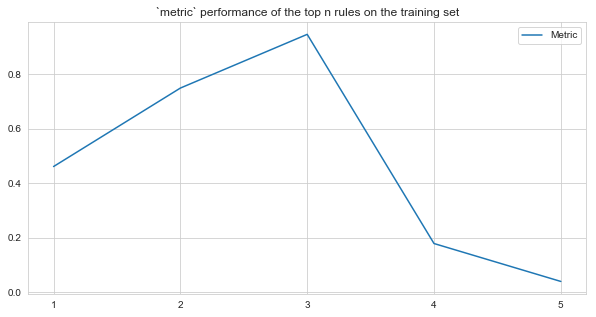

In [7]:
gf.plot_top_n_performance_on_train()

----

## Drop rules which degrade combined performance from another dataset

Use the `transform` method to drop the rules which degrade the combined performance from a given dataset.

In [8]:
X_rules_test_filtered = gf.transform(X_rules=X_rules_test)

### Outputs

The `transform` method returns a dataframe with the filtered rules dropped:

In [11]:
X_rules_test_filtered.head()

,Rule1,Rule2,Rule3
eid,,,
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


We can also plot the combined performance of the top *n* rules (calculated from running the `fit` method) on the test set using the `plot_top_n_performance` method:

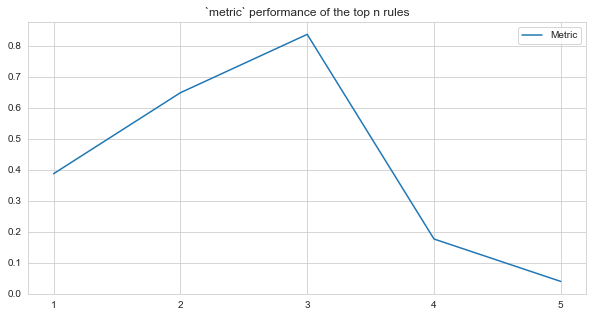

In [12]:
gf.plot_top_n_performance(
    X_rules=X_rules_test, 
    y=y_test
)

----

## Calculate rules which degrade combined performance and drop them from a dataset (in one step)

You can also use the `fit_transform` method to calculate the rules which degrade combined performance and drop them from the training set.

In [13]:
gf = GreedyFilter(**params)
X_rules_train_filtered = gf.fit_transform(
    X_rules=X_rules_train, 
    y=y_train
)

--- Calculating performance of top n rules ---
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 2322.43it/s]


### Outputs

The `fit_transform` method returns a dataframe with the filtered rules dropped. See the `Attributes` section in the class docstring for a description of each attribute generated:

In [14]:
gf.rules_to_keep

['Rule1', 'Rule2', 'Rule3']

In [15]:
X_rules_train_filtered.head()

,Rule1,Rule2,Rule3
eid,,,
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


----